# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [87]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [88]:
data = pd.read_csv('data/unconv.zip')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB
             Well         Por        Perm          AI     Brittle         TOC  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean   100.500000   14.991150    4.330750    2.968850   48.161950    0.990450   
std     57.879185    2.971176    1.731014    0.566885   14.129455    0.481588   
min      1.000000    6.550000    1.130000    1.280000   10.940000   -0.190000   
25%     50.750000   12.912500    3.122500    2.547500   37.7

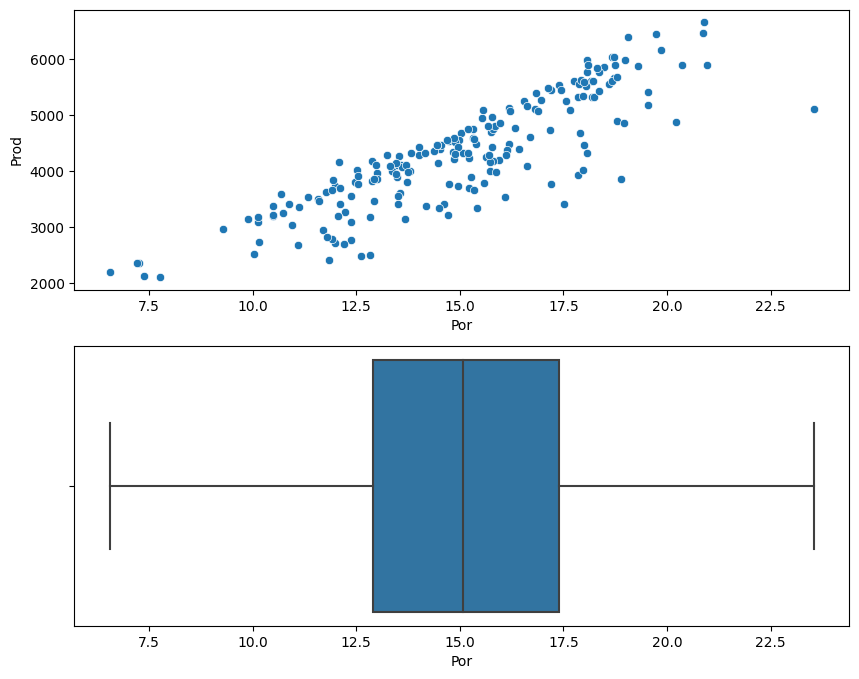

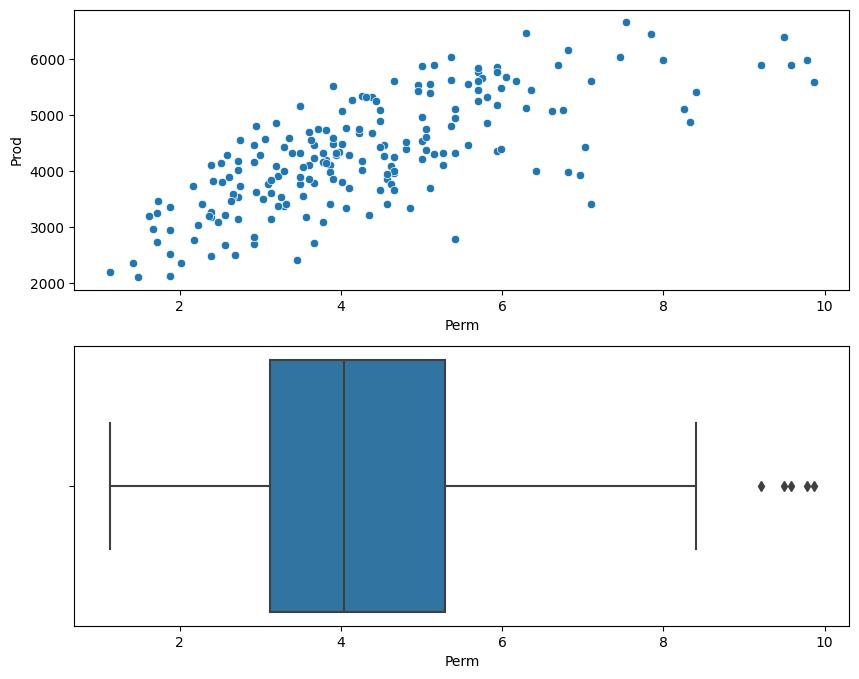

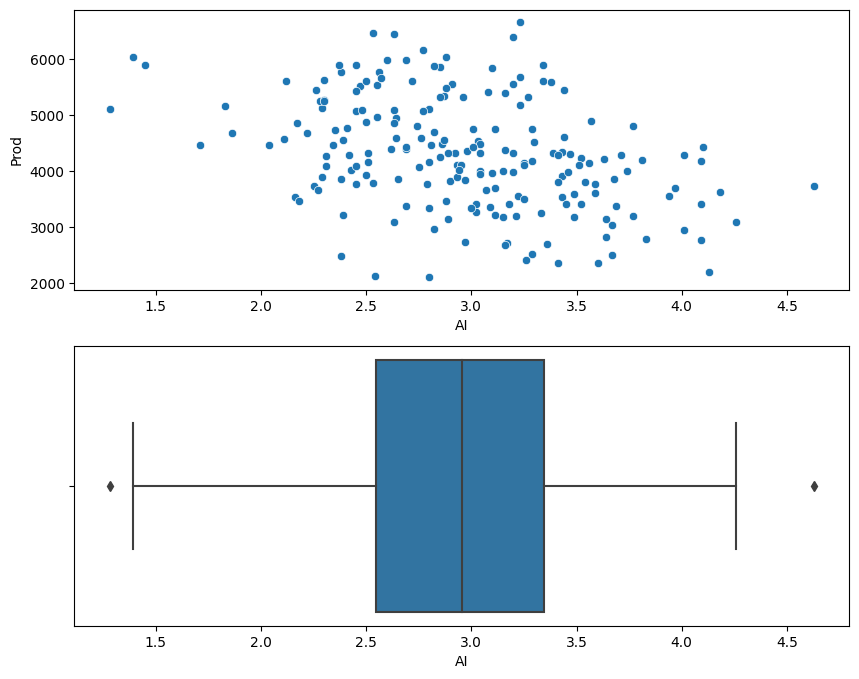

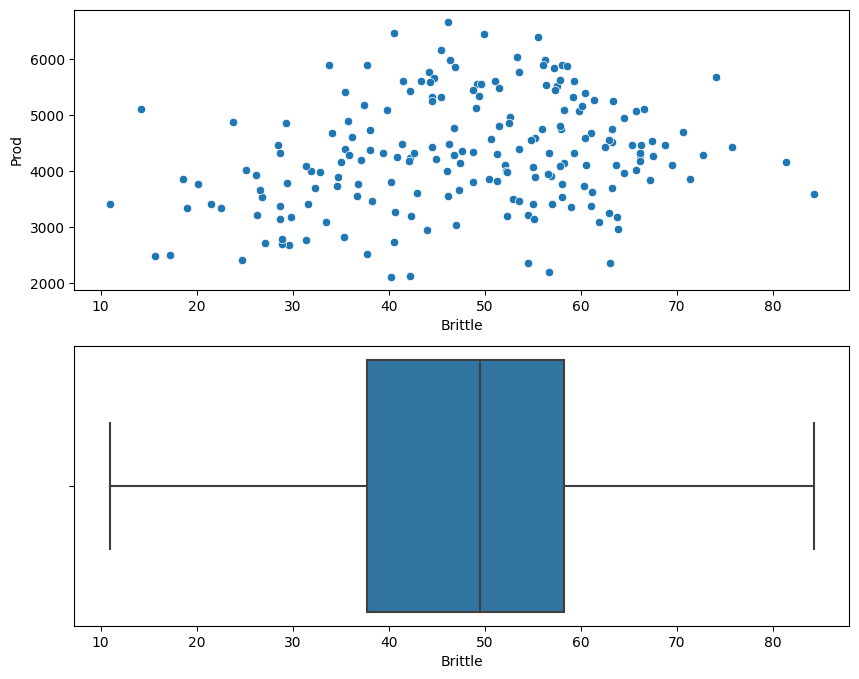

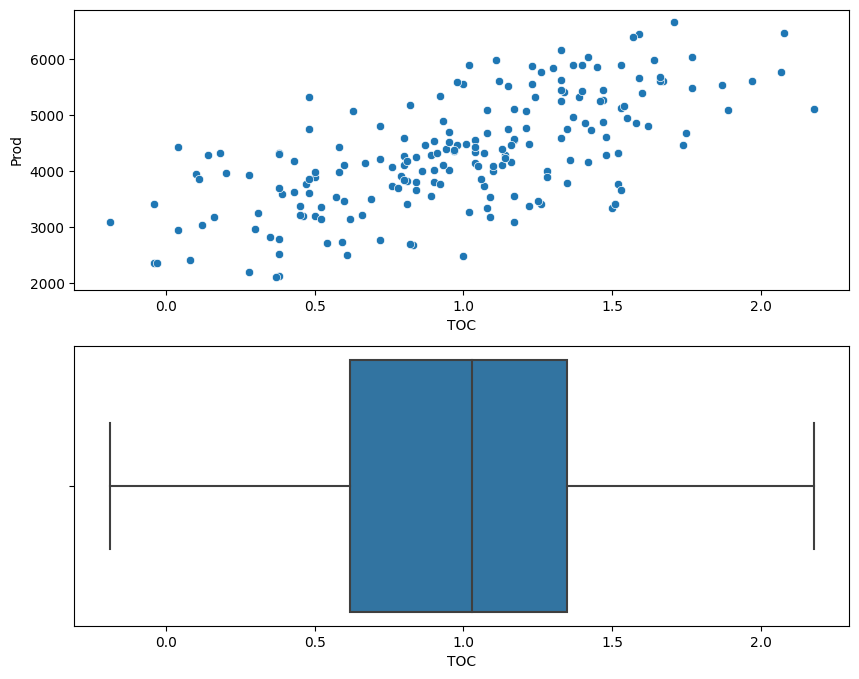

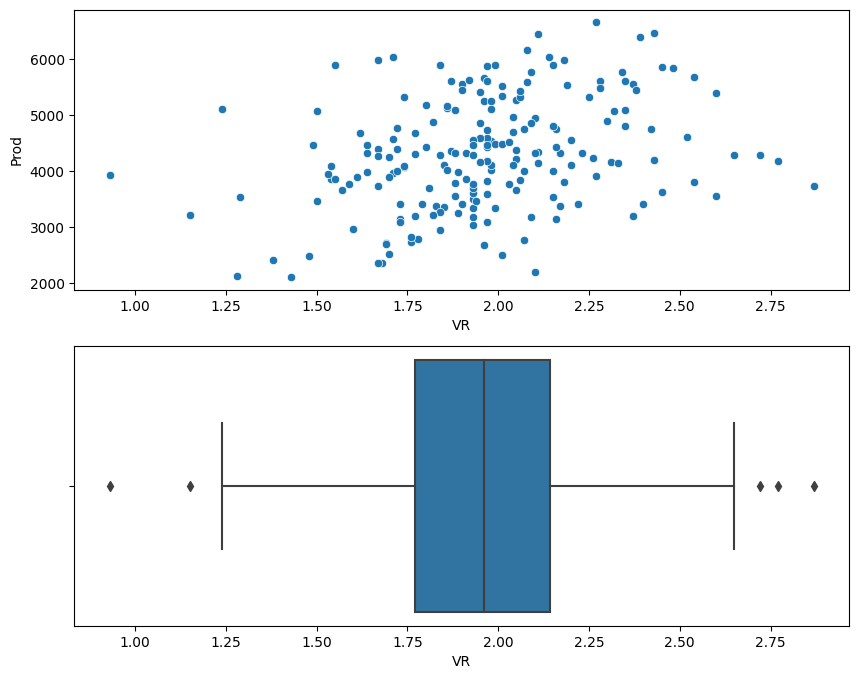

In [89]:
# Ваш код здесь
# посмотрим на данные стандартными методами info и describe
data.info()

print(data.describe())

# посмотрим на взаимосвязь завимостей через графики

#сделаем временную таблицу без лишних столбцов
temp_data = data.drop(['Prod', 'Well'], axis=1)

#построим фигуру с использованием циклов по столбцам
for i in temp_data.columns:
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
    sns.scatterplot(
        x=temp_data[i], 
        y=data['Prod'], 
        legend=True, 
        ax=axes[0]
    );
    sns.boxplot(
        data=data,
        #y='country',
        x=data[i],
        orient='h',
        width=0.9,
        ax=axes[1]
    );

#### Выводы:
По результатам краткого разведывательного анализа и построенных графиков:
1. Пропусков данных нет, все признаки - числовые, нулей в данных тоже нет
2. Отмечается наличие ярко выраженной прямой зависимости между целевым признаком Prod и признаками Por, Perm, ТОС. Между остальными признаками и целевым признаком отсутствует явно выраженная прямая или обратная зависимость (нужно доп исследование с матрицей корреляций)
3. Выбросов почти нет, большая часть значений признаков находится вблизи средних значений

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
Well,1.000000,0.068927,0.077928,0.041483,-0.079252,0.022624,-0.007279,0.026817
Por,0.068927,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.077928,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,0.041483,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.079252,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.022624,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,-0.007279,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.026817,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000


Ранг матрицы корреляций: 8
Определитель матрицы корреляций: 0.0007299388072652082


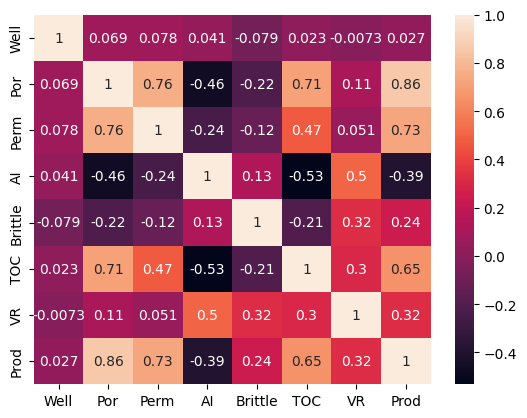

In [90]:
# Ваш код здесь
# корреляционная матрица
display(data.corr())

#визуализация матрицы в виде тепловой карты
sns.heatmap(data.corr(), annot=True)

# переводим в ряды, считаем ранг и определитель
A = data.corr().values
print(f'Ранг матрицы корреляций: {np.linalg.matrix_rank(A)}')
print(f'Определитель матрицы корреляций: {np.linalg.det(A)}')

#### Выводы:
1. Сильнее всего коррелируют с целевой переменной факторы Por, Perm, TOC
2. Корреляционная матрица является плохо обусловенной (её опредитель близок к нулю)
3. Т.к. ранг равен количеству столбцов, то чистой коллинераности/мультиколлинеарности в данных нет, но определитель всё равно очень близок к нулю, т.е. сказывается сильное влиение показателя Por c коэффициентом корреляции 0,86
4. В данном случае модель классической линейной регрессии по методу наименьших квадратов можно применить, т.к. определитель не равен нулю, а ранг матрицы корреляций равен количеству неизвестных, но возможны проблемы с стабильностью весов получаемых коэффициентов в модели.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [91]:
# Ваш код здесь

# создаем df только с признаками, добавляем столбец в единицами, выделяем целевой признак в отдельный df
X = data.drop('Prod', axis=1)
X = np.column_stack((np.ones(200), X)) 
y = data[['Prod']]

# вычислим OLS-оценку для коэффициентов
w_hat = np.linalg.inv(X.T@X)@X.T@y

#оформим коэффициенты в виде таблицы
coef_list = ['w0'] + list(data.columns)
coef_list.remove('Prod')
df_coef  = pd.DataFrame({'Признаки':coef_list})
df_coef['Коэффициенты модели'] = round(pd.DataFrame(w_hat.values))

df_coef


,Признаки,Коэффициенты модели
0,w0,-1232.0
1,Well,0.0
2,Por,230.0
3,Perm,116.0
4,AI,-365.0
5,Brittle,25.0
6,TOC,-78.0
7,VR,785.0


#### Выводы:
1. В данных есть признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние. Это признак Well (это идентификатор скважины). Его коэффициент в модели после округления равен 0.
2. Интерпретация трёх коэффициентов в модели:
   * Каждое увеличение показателя пористости скважины (признак Por) на 1% ожидаемо будет увеличивать добычу газа на ней на 230 млн. куб.футов/сутки
   * Каждое увеличение показателя проницаемости скважины (признак Perm) на 1 ожидаемо будет увеличивать добычу газа на ней на 116 млн. куб.футов/сутки
   * Каждое увеличение показателя общего органического углерода скважины (признак TOC) на 1% ожидаемо будет снижать добычу газа на ней на 78 млн. куб.футов/сутки

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [92]:
# Ваш код здесь

#используем словарь с новыми данными
new_well = {
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
}

#занесем данные по новой скважине в df c коэффициентами
df_coef['Новая скважина'] = df_coef['Признаки'].apply(lambda x: new_well[x] if x in new_well.keys() else 1)

#сделаем прогноз по новой скважине
df_coef['Прогноз по новой скважине'] = df_coef['Новая скважина'] * df_coef['Коэффициенты модели']
print(f"Прогноз по новой скважине - {df_coef['Прогноз по новой скважине'].sum()} млн. куб. футов в сутки")

#абсолютная ошибка построенного прогноза
print(f"Абсолютная ошибка прогноза - {round(df_coef['Прогноз по новой скважине'].sum() - 4748.315024, 2)} млн. куб. футов в сутки")


#вот ещё короткий способ сделать прогноз
#new=np.array([1]+list(new_well.values()))
#print('prediction:', (new@(round(w_hat))).values)
#prediction: [4715.26]


#Построим прогноз выработки газа для всех скважин из обучающего набора данных. 
#Используем метрики MAE и MAPE

prediction_list_mae = []
prediction_list_mape = []

for i in range(data.shape[0]):
    exist_pred = np.array([1]+list(data.iloc[i,:].drop('Prod',axis=0)))
    prediction_list_mae.append(abs(data['Prod'][i]-(exist_pred@(round(w_hat))).values[0]))
    prediction_list_mape.append(abs((data['Prod'][i]-(exist_pred@(round(w_hat))).values[0])/data['Prod'][i]))

print(f'MAE -  {round(sum(prediction_list_mae)/data.shape[0],2)} млн. куб. футов в сутки')
print(f'MAPE - {round(sum(prediction_list_mape)/data.shape[0]*100, 2)} %')

Прогноз по новой скважине - 4715.26 млн. куб. футов в сутки
Абсолютная ошибка прогноза - -33.06 млн. куб. футов в сутки
MAE -  154.56 млн. куб. футов в сутки
MAPE - 3.65 %


#### Выводы:
1. Прогноз по новой скважине - 4715.26 млн. куб. футов в сутки
2. Абсолютная ошибка прогноза - -33.06 млн. куб. футов в сутки
3. Для оценки качества модели будут использованы метрики MAE и MAPE, т.к. по ним можно дать корректную интерпретацию в отличие от например, метрик MSE, коэффициента детерминации и т.д.
4. По результатам полученных метрик предсказание модели в среднем отличается от истинного значения на 154,56 млн. куб. футов в сутки или 3,65%

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [93]:
# Ваш код здесь
# Добавим коэффициенты корреляции в таблицу коэффициентов для наглядности

df_coef['Коэффициенты корреляции'] = df_coef['Признаки'].apply(lambda x: round(data.corr()['Prod'][x],2) if x in data.corr()['Prod'].keys() else 0)
df_coef[['Признаки','Коэффициенты модели','Коэффициенты корреляции']]

,Признаки,Коэффициенты модели,Коэффициенты корреляции
0,w0,-1232.0,0.00
1,Well,0.0,0.03
2,Por,230.0,0.86
3,Perm,116.0,0.73
4,AI,-365.0,-0.39
5,Brittle,25.0,0.24
6,TOC,-78.0,0.65
7,VR,785.0,0.32


#### Выводы:
1. В модели есть фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции, т.е. корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Это фактор ТОС.
2. Данное обстоятельноство связано с тем, что матрица корреляций практически вырождена (определитель близок к нулю), т.е. между некоторыми признаками есть достаточно высокая корреляция (в данном случае это факторы ТОС и Perm). Поэтому в модели у них будут коэффициенты с противоположными знаками. 

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

MAE -  171.87 млн. куб. футов в сутки
MAPE - 4.05 %


,Признаки,Коэффициенты модели,Коэффициенты корреляции
0,w0,-1835.0,0.00
1,Por,293.0,0.86
2,AI,-200.0,-0.39
3,Brittle,28.0,0.24
4,VR,517.0,0.32


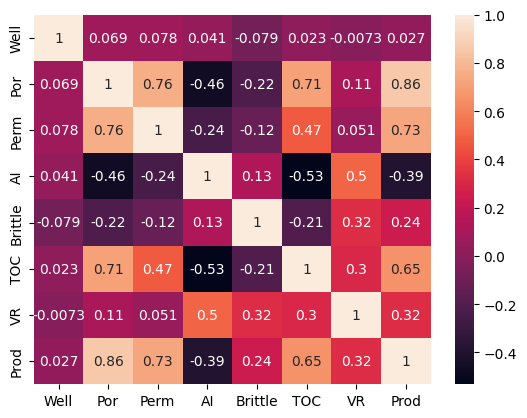

In [94]:
# Ваш код здесь
#Посмотрим ещё раз на тепловую карту
sns.heatmap(data.corr(), annot=True)

#С учётом указанных выше условий исключим фактор Well (слишком низкий коэффициент)
#Из пар факторов Por-Perm (коэффициент 0,76) и Por-TOC (коэффицент 0,71) оставляем фактор Por - у него выше коэффицент с целевым признаком Prod. Признаки Perm и TOC исключаем.


#строим обновленную модель
X = data.drop(['Prod','Well','Perm','TOC'], axis=1)
X = np.column_stack((np.ones(200), X)) 
y = data[['Prod']]

# вычислим OLS-оценку для коэффициентов
w_hat = np.linalg.inv(X.T@X)@X.T@y

#оформим коэффициенты в виде таблицы
coef_list = ['w0'] + list(data.columns)
unwanted = {'Prod','Well','Perm','TOC'}
coef_list= [ele for ele in coef_list if ele not in unwanted]
df_coef_new  = pd.DataFrame({'Признаки':coef_list})
df_coef_new['Коэффициенты модели'] = round(pd.DataFrame(w_hat.values))



#Построим прогноз выработки газа для всех скважин из обучающего набора данных
#Используем метрики MAE и MAPE

prediction_list_mae_new = []
prediction_list_mape_new = []

for i in range(data.shape[0]):
    exist_pred = np.array([1]+list(data.iloc[i,:].drop(['Prod','Well','Perm','TOC'],axis=0)))
    prediction_list_mae_new.append(abs(data['Prod'][i]-(exist_pred@(round(w_hat))).values[0]))
    prediction_list_mape_new.append(abs((data['Prod'][i]-(exist_pred@(round(w_hat))).values[0])/data['Prod'][i]))

print(f'MAE -  {round(sum(prediction_list_mae_new)/data.shape[0],2)} млн. куб. футов в сутки')
print(f'MAPE - {round(sum(prediction_list_mape_new)/data.shape[0]*100, 2)} %')


#выведем таблицу с коэффициентами для наглядности
df_coef_new['Коэффициенты корреляции'] = df_coef_new['Признаки'].apply(lambda x: round(data.corr()['Prod'][x],2) if x in data.corr()['Prod'].keys() else 0)
df_coef_new[['Признаки','Коэффициенты модели','Коэффициенты корреляции']]


#### Выводы:
1.  Интерпретация трёх коэффициентов в модели:
   * Каждое увеличение показателя пористости скважины (признак Por) на 1% ожидаемо будет увеличивать добычу газа на ней на 293 млн. куб.футов/сутки
   * Каждое увеличение показателя проницаемости акустическго импеданса (признак AI) на 1 $кг/м^2 * 10^6$ ожидаемо будет уменьшать добычу газа на ней на 200 млн. куб.футов/сутки
   * Каждое увеличение коэффициента хрупкости скважины (признак Brittle) на 1% ожидаемо будет увеличивать добычу газа на ней на 28 млн. куб.футов/сутки
2.  По результатам полученных метрик предсказание модели в среднем отличается от истинного значения на 171,87 млн. куб. футов в сутки или 4,05%. По сравнению с предыдущим вариатом есть ухудшение показателей метрик, но оно незначительное.
3. Из-за исключения некоторых признаков удалось побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции (см. выведенную таблицу)

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [95]:
# Ваш код здесь
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

# создаём модель линейной регрессии
lr = LinearRegression(fit_intercept=False) #ставим False, т.к. уже есть столбец с единицами
# вычисляем коэффициенты регрессии
lr.fit(X, y)
#print('w_hat:', model.coef_)


#делаем предсказание
y_pred = lr.predict(X)


#считаем и выводим метрик
print(f'MAE -  {round(mean_absolute_error(y, y_pred),2)} млн. куб. футов в сутки')
print(f'MAPE - {round(mean_absolute_percentage_error(y, y_pred)*100, 2)} %')


#выводим коэффициенты в таблице
df_coef_new['Коэффициенты модели LR'] = round(pd.DataFrame(lr.coef_)).iloc[0,:]
df_coef_new[['Признаки','Коэффициенты модели','Коэффициенты модели LR']]


MAE -  171.43 млн. куб. футов в сутки
MAPE - 4.04 %


,Признаки,Коэффициенты модели,Коэффициенты модели LR
0,w0,-1835.0,-1835.0
1,Por,293.0,293.0
2,AI,-200.0,-200.0
3,Brittle,28.0,28.0
4,VR,517.0,517.0


#### Выводы:
По результатам оценки метрик: результаты, полученные путем библиотечной реалиазации sklearn сопоставимы с табличной реализацией методом OLS. Отличие в метриках - десятые доли, в коэфиицентах - не отмечается из-за использования округления до целого числа.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [96]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [97]:
# Ваш код здесь

X = data.drop(['Prod','Well','Perm','TOC'], axis=1)
y = data[['Prod']]

# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# подгоняем параметры стандартизатора
X = scaler.fit_transform(X)
# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)

#выводим на экран информацию по полиномиальных признаках
display(pd.DataFrame(X).head())
print(f'Количество факторов после генерации признаков - {len(pd.DataFrame(X).columns)}')

# создаём модель линейной регрессии
lr_poly = LinearRegression()
 
# оцениваем качество модели на кросс-валидации, метрика — MAPE и МAE
cv_results = cross_validate(lr_poly, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
cv_results1 = cross_validate(lr_poly, X, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)


#считаем метрики
print('MAE на тренировочных фолдах: {:.2f} млн. куб. футов в сутки'.format(-cv_results1['train_score'].mean()))
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))

print('MAE на валидационных фолдах: {:.2f} млн. куб. футов в сутки'.format(-cv_results1['test_score'].mean()))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-0.982256,-0.298603,2.358297,1.152048,0.964826,0.293305,-2.316451,-1.131606,0.089164,-0.704195,...,-0.026625,0.210275,0.102721,-1.660701,-0.811267,-0.396311,13.115830,6.407195,3.129970,1.529017
1,-0.881032,0.444147,-0.141332,-0.280931,0.776218,-0.391308,0.124518,0.247509,0.197266,-0.062772,...,0.087615,-0.027880,-0.055418,0.008872,0.017635,0.035053,-0.002823,-0.005612,-0.011154,-0.022172
2,-0.327677,1.841224,1.748113,2.518377,0.107372,-0.603327,-0.572817,-0.825215,3.390105,3.218666,...,6.241941,5.926284,8.537563,5.626591,8.105816,11.677454,5.342052,7.695903,11.086922,15.972114
3,0.903875,-0.599240,-0.592585,-0.280931,0.816990,-0.541638,-0.535623,-0.253926,0.359088,0.355101,...,-0.215180,-0.212791,-0.100879,-0.210428,-0.099759,-0.047293,-0.208091,-0.098651,-0.046768,-0.022172
4,0.853263,0.373409,-2.640962,-0.214280,0.728058,0.318616,-2.253436,-0.182838,0.139434,-0.986158,...,0.052066,-0.368240,-0.029878,2.604406,0.211314,0.017145,-18.419868,-1.494537,-0.121263,-0.009839


Количество факторов после генерации признаков - 34
MAE на тренировочных фолдах: 75.35 млн. куб. футов в сутки
MAPE на тренировочных фолдах: 1.77 %
MAE на валидационных фолдах: 110.47 млн. куб. футов в сутки
MAPE на валидационных фолдах: 2.68 %


#### Вывводы:
1. После стандартизации признаков их количество увеличилось до 34
2. После обучения линейной регрессии и проверки через кросс-валидацию были получены следующие результаты, характеризующие её качество:
   * На тренировочных фолдах предсказание модели в среднем отличается от истинного значения на 75,35 млн. куб. футов в сутки или 1,77%
   * На валидационных фолдах предсказание модели в среднем отличается от истинного значения на 110,47 млн. куб. футов в сутки или 2,68%

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [98]:
# Ваш код здесь

#используем GridSearchCV для оптимизации
from sklearn.model_selection import GridSearchCV
from sklearn import metrics #метрики

#по совету ментора используем заданный список значений с 10 до 0.001
param_distributions = {'alpha': [10,9,8,7,6,5,4,3,2,1,0.1,0.01,0.001]},
            
grid_search = GridSearchCV(
    estimator=Lasso(), 
    param_grid=param_distributions, 
    n_jobs = -1,
    scoring='neg_mean_absolute_percentage_error'
)  
%time grid_search.fit(X, y) 
y_pred = grid_search.predict(X)
print('MAPE на тестовом наборе: {:.2f}'.format(metrics.mean_absolute_percentage_error(y, y_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))


lasso = Lasso(alpha=grid_search.best_params_['alpha'])
lasso.fit(X, y) #X уже стандартизирован (см. блок кода выше)

# оцениваем качество модели на кросс-валидации, метрика — MAPE и МAE
cv_results = cross_validate(lasso, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True, n_jobs = -1)
cv_results1 = cross_validate(lasso, X, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True, n_jobs = -1)


#считаем метрики
print('MAE на тренировочных фолдах: {:.2f} млн. куб. футов в сутки'.format(-cv_results1['train_score'].mean()))
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))

print('MAE на валидационных фолдах: {:.2f} млн. куб. футов в сутки'.format(-cv_results1['test_score'].mean()))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))



CPU times: total: 156 ms
Wall time: 552 ms
MAPE на тестовом наборе: 0.02
Наилучшие значения гиперпараметров: {'alpha': 5}
MAE на тренировочных фолдах: 78.30 млн. куб. футов в сутки
MAPE на тренировочных фолдах: 1.83 %
MAE на валидационных фолдах: 95.69 млн. куб. футов в сутки
MAPE на валидационных фолдах: 2.28 %


#### Выводы:
При пострении модели линейной регрессии с использование $L_1$-регуляризации и подбором оптимального параметра `alpha` были получены следующие значения метрик 
* на тренировочных фолдах: MAE - 78,3 млн. куб. футов в сутки, MAPE - 1.83%. Таким образом по результатам полученных метрик предсказание модели в среднем отличается от истинного значения на 78,3 млн. куб. футов в сутки или 1,83%.
* на валидационных фолдах: MAE - 95,69 млн. куб. футов в сутки, MAPE - 2,28%. Таким образом по результатам полученных метрик предсказание модели в среднем отличается от истинного значения на 95,69 млн. куб. футов в сутки или 2,28%.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [99]:
# Ваш код здесь

#используем GridSearchCV для оптимизации
from sklearn.model_selection import GridSearchCV
from sklearn import metrics #метрики

#по совету ментора используем заданный список значений с 10 до 0.001
param_distributions = {'alpha': [10,9,8,7,6,5,4,3,2,1,0.1,0.01,0.001]},
            
grid_search = GridSearchCV(
    estimator=Ridge(), 
    param_grid=param_distributions, 
    n_jobs = -1,
    scoring='neg_mean_absolute_percentage_error'
)  
%time grid_search.fit(X, y) 
y_pred = grid_search.predict(X)
print('MAPE на тестовом наборе: {:.2f}'.format(metrics.mean_absolute_percentage_error(y, y_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))


ridge = Ridge(alpha=grid_search.best_params_['alpha'])
ridge.fit(X, y) #X уже стандартизирован (см. блок кода выше)

# оцениваем качество модели на кросс-валидации, метрика — MAPE и МAE
cv_results = cross_validate(ridge, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True, n_jobs = -1)
cv_results1 = cross_validate(ridge, X, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True, n_jobs = -1)


#считаем метрики
print('MAE на тренировочных фолдах: {:.2f} млн. куб. футов в сутки'.format(-cv_results1['train_score'].mean()))
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))

print('MAE на валидационных фолдах: {:.2f} млн. куб. футов в сутки'.format(-cv_results1['test_score'].mean()))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))

CPU times: total: 125 ms
Wall time: 323 ms
MAPE на тестовом наборе: 0.02
Наилучшие значения гиперпараметров: {'alpha': 0.1}
MAE на тренировочных фолдах: 75.32 млн. куб. футов в сутки
MAPE на тренировочных фолдах: 1.77 %
MAE на валидационных фолдах: 110.14 млн. куб. футов в сутки
MAPE на валидационных фолдах: 2.67 %


#### Выводы:
При пострении модели линейной регрессии с использование $L_2$-регуляризации и подбором оптимального параметра `alpha` были получены следующие значения метрик 
* на тренировочных фолдах: MAE - 75.23 млн. куб. футов в сутки, MAPE - 1.77%. Таким образом по результатам полученных метрик предсказание модели в среднем отличается от истинного значения на 75.23 млн. куб. футов в сутки или 1.77%.
* на валидационных фолдах: MAE - 110.14 млн. куб. футов в сутки, MAPE - 2.67%. Таким образом по результатам полученных метрик предсказание модели в среднем отличается от истинного значения на 110.14 млн. куб. футов в сутки или 2.67%.

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [100]:
# Ваш код здесь

#используем GridSearchCV для оптимизации
from sklearn.model_selection import GridSearchCV
from sklearn import metrics #метрики

#по совету ментора используем заданный список значений с 10 до 0.001
param_distributions = {'alpha': [10,9,8,7,6,5,4,3,2,1,0.1,0.01,0.001],
                       'l1_ratio': list(np.linspace(0.1, 1, 10, dtype=float))
                       },
            
grid_search = GridSearchCV(
    estimator=ElasticNet(), 
    param_grid=param_distributions, 
    #cv=5, 
    n_jobs = -1,
    scoring='neg_mean_absolute_percentage_error'
)  
%time grid_search.fit(X, y) 
y_pred = grid_search.predict(X)
print('MAPE на тестовом наборе: {:.2f}'.format(metrics.mean_absolute_percentage_error(y, y_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))


el_net = ElasticNet(alpha=grid_search.best_params_['alpha'], l1_ratio=grid_search.best_params_['l1_ratio'])
el_net.fit(X, y) #X уже стандартизирован (см. блок кода выше)

# оцениваем качество модели на кросс-валидации, метрика — MAPE и МAE
cv_results = cross_validate(el_net, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True, n_jobs = -1)
cv_results1 = cross_validate(el_net, X, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True, n_jobs = -1)


#считаем метрики
print('MAE на тренировочных фолдах: {:.2f} млн. куб. футов в сутки'.format(-cv_results1['train_score'].mean()))
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))

print('MAE на валидационных фолдах: {:.2f} млн. куб. футов в сутки'.format(-cv_results1['test_score'].mean()))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))

CPU times: total: 812 ms
Wall time: 4.91 s
MAPE на тестовом наборе: 0.02
Наилучшие значения гиперпараметров: {'alpha': 5, 'l1_ratio': 1.0}
MAE на тренировочных фолдах: 78.30 млн. куб. футов в сутки
MAPE на тренировочных фолдах: 1.83 %
MAE на валидационных фолдах: 95.69 млн. куб. футов в сутки
MAPE на валидационных фолдах: 2.28 %


#### Выводы:
При пострении модели линейной регрессии с использование $L_1$- и $L_2$-регуляризации и подбором оптимального параметра `alpha` и `l1-ratio` были получены следующие значения метрик:
* на тренировочных фолдах: MAE - 78.30 млн. куб. футов в сутки, MAPE - 1.83%. Таким образом по результатам полученных метрик предсказание модели в среднем отличается от истинного значения на 78.30 млн. куб. футов в сутки или 1.83%.
* на валидационных фолдах: MAE - 95.69 млн. куб. футов в сутки, MAPE - 2.28%. Таким образом по результатам полученных метрик предсказание модели в среднем отличается от истинного значения на 95.69 млн. куб. футов в сутки или 2.28%.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [101]:
# Ваш код здесь

#задаем строки и столбцы
name_df = [lr,lr_poly,lasso,ridge,el_net]
columns_df = ['Имя модели','Гиперпараметры','Полиномиальные признаки','Значение МАPE на тренировочных фолдах, %','Значение МАPE на валидационных фолдах, %']

#создаем df и заполняем его
result_df = pd.DataFrame(columns=columns_df)

result_df['Имя модели'] = name_df 
result_df['Полиномиальные признаки'] = result_df['Имя модели'].apply(lambda x: 'Нет' if x==lr else 'Да')


#функция для вывода гиперпараметров
def hyperparams(name):
    if ('alpha' in name.get_params()) and ('l1_ratio' in name.get_params()):
        return f"'alpha' - {name.get_params()['alpha']}, 'l1_ratio' - {name.get_params()['l1_ratio']}"
    if ('alpha' in name.get_params()) and ('l1_ratio' not in name.get_params()):
        return f"'alpha' - {name.get_params()['alpha']}"
    else:
        return None
        
    
result_df['Гиперпараметры'] = result_df['Имя модели'].apply(hyperparams)


#значения метрик
result_df['Значение МАPE на тренировочных фолдах, %'] = result_df['Имя модели'].apply(lambda b: round(-cross_validate(b, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True, n_jobs = -1)['train_score'].mean()* 100 if b!=lr 
                                                                                   else round(mean_absolute_percentage_error(y, lr.predict(np.column_stack((np.ones(200), data.drop(['Prod','Well','Perm','TOC'], axis=1))) ))*100, 2), 2))

result_df['Значение МАPE на валидационных фолдах, %'] = result_df['Имя модели'].apply(lambda b: round(-cross_validate(b, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True, n_jobs = -1)['test_score'].mean()* 100 if b!=lr 
                                                                                   else round(mean_absolute_percentage_error(y, lr.predict(np.column_stack((np.ones(200), data.drop(['Prod','Well','Perm','TOC'], axis=1))) ))*100, 2), 2))


#поставим краткие имена моделей
result_df['Имя модели'] = ['lr','lr_poly','lasso','ridge','el_net']


result_df

,Имя модели,Гиперпараметры,Полиномиальные признаки,"Значение МАPE на тренировочных фолдах, %","Значение МАPE на валидационных фолдах, %"
0,lr,None,Нет,4.04,4.04
1,lr_poly,None,Да,1.77,2.68
2,lasso,'alpha' - 5,Да,1.83,2.28
3,ridge,'alpha' - 0.1,Да,1.77,2.67
4,el_net,"'alpha' - 5, 'l1_ratio' - 1.0",Да,1.83,2.28


#### Выводы:
С учётом проделанной работы по наилучшими по метрикам оказались модели Lasso и ElasticNet со значениями MAPE - 2.28%. У них одинаковые наилучшие метрики, т.к. в результате подбора гиперпараметров у ElasticNet коэффициент `l1_ratio` оказался равен 1, т.е. по сути модель ElasticNet выполняет функции модели Lasso.

В целом все модели, построенные на полиномиальных признаках, позывают улучшение результатов по метрикам по сравнению с обычными моделями. Влияние же применения регуляризации в данном случае дало лишь незначительное улучшение результатов предсказаний модели.

Исходя из этого оптимально использовать модель на полиномиальных признаках с вариантом регуляризации Lasso, т.к ElasticNet не дает улучшение результатов по метрикам.